# **2 - EDA**

In [1]:
# Import the required libraries.
import sys
import os
sys.path.append(os.path.abspath("../src"))
import util

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Load Config
---

In [2]:
# Load the configuration file.
config = util.load_config()

## 1. Load Train Data
---

In [3]:
# Load the train data.
path = config["path_train_set"]

X_train = util.pickle_load(f"../{path[0]}")
y_train = util.pickle_load(f"../{path[1]}")

In [4]:
# Sanity check the X_train.
X_train.head()

,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
Patient_ID,,,,,,,,,,,,,,,,,
19882,50,Male,7.544846,Parietal,Glioblastoma,II,Nausea,Seizures,Nausea,No,No,No,55.441331,2.380341,No,Negative,Yes
17741,46,Male,1.450586,Temporal,Medulloblastoma,II,Nausea,Vision Issues,Headache,No,No,No,67.185624,1.248645,Yes,Negative,No
5362,30,Female,1.108693,Parietal,Medulloblastoma,IV,Seizures,Vision Issues,Seizures,No,Yes,Yes,50.656056,2.621739,Yes,Positive,Yes
12736,38,Female,4.576600,Occipital,Meningioma,IV,Seizures,Nausea,Vision Issues,Yes,Yes,Yes,78.252317,1.696516,Yes,Positive,No
16231,57,Male,3.043994,Parietal,Astrocytoma,I,Nausea,Seizures,Seizures,Yes,No,Yes,84.844266,1.760073,Yes,Negative,Yes


In [5]:
# Sanity check the y_train.
y_train.head()

Patient_ID
19882       Benign
17741       Benign
5362        Benign
12736       Benign
16231    Malignant
Name: Tumor_Type, dtype: object

In [6]:
# Join train input & output.
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required,Tumor_Type
Patient_ID,,,,,,,,,,,,,,,,,,
19882,50,Male,7.544846,Parietal,Glioblastoma,II,Nausea,Seizures,Nausea,No,No,No,55.441331,2.380341,No,Negative,Yes,Benign
17741,46,Male,1.450586,Temporal,Medulloblastoma,II,Nausea,Vision Issues,Headache,No,No,No,67.185624,1.248645,Yes,Negative,No,Benign
5362,30,Female,1.108693,Parietal,Medulloblastoma,IV,Seizures,Vision Issues,Seizures,No,Yes,Yes,50.656056,2.621739,Yes,Positive,Yes,Benign
12736,38,Female,4.576600,Occipital,Meningioma,IV,Seizures,Nausea,Vision Issues,Yes,Yes,Yes,78.252317,1.696516,Yes,Positive,No,Benign
16231,57,Male,3.043994,Parietal,Astrocytoma,I,Nausea,Seizures,Seizures,Yes,No,Yes,84.844266,1.760073,Yes,Negative,Yes,Malignant


## 2. Split Data
---
1. Numerical-Categorical split

In [7]:
# Num-Cat Split.
num_cols = list(config["int64_columns"] + config["float64_columns"])
cat_cols = list(config["object_columns"])

print(f"Numerical features  :\n{num_cols}\n")
print(f"Categorical Features:\n{cat_cols}")

Numerical features  :
['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']

Categorical Features:
['Gender', 'Location', 'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required']


In [8]:
# Data Defense: Number of Features.
assert (len(num_cols) + len(cat_cols) == len(X_train.columns)), "Number of features do not match!"

In [9]:
# Filter train input based on column type.
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

In [10]:
# Sanity check numerical features.
X_train_num.head()

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
Patient_ID,,,,
19882,50,7.544846,55.441331,2.380341
17741,46,1.450586,67.185624,1.248645
5362,30,1.108693,50.656056,2.621739
12736,38,4.576600,78.252317,1.696516
16231,57,3.043994,84.844266,1.760073


In [11]:
# Sanity check categorical columns.
X_train_cat.head()

,Gender,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Family_History,MRI_Result,Follow_Up_Required
Patient_ID,,,,,,,,,,,,,
19882,Male,Parietal,Glioblastoma,II,Nausea,Seizures,Nausea,No,No,No,No,Negative,Yes
17741,Male,Temporal,Medulloblastoma,II,Nausea,Vision Issues,Headache,No,No,No,Yes,Negative,No
5362,Female,Parietal,Medulloblastoma,IV,Seizures,Vision Issues,Seizures,No,Yes,Yes,Yes,Positive,Yes
12736,Female,Occipital,Meningioma,IV,Seizures,Nausea,Vision Issues,Yes,Yes,Yes,Yes,Positive,No
16231,Male,Parietal,Astrocytoma,I,Nausea,Seizures,Seizures,Yes,No,Yes,Yes,Negative,Yes


In [12]:
# Serialize the numerical & categorical features.
path_train_num = config["path_train_num"][0]
path_train_cat = config["path_train_cat"][0]

util.pickle_dump(X_train_num, f"../{path_train_num}")
util.pickle_dump(X_train_cat, f"../{path_train_cat}")

Data serialized.
Data serialized.


**Summary:**
- Numerical & categorical features splitted.

## 3. EDA
---
1. General EDA
2. Numerical Features EDA
3. Categorical Features EDA
4. Visualization

### 3.1. General EDA
---

In [13]:
# Check missing value.
data_train.isnull().sum()

Age                    0
Gender                 0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
Tumor_Type             0
dtype: int64

In [14]:
# Check whether exists duplicate data.
data_train.duplicated().sum()

np.int64(0)

**Summary:**
- No missing value in train data.
- No duplicate data in train data.

### 3.2. Numerical EDA
---

In [15]:
# Show the summary statistics.
X_train_num.describe()

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,16000.00000,16000.000000,16000.000000,16000.000000
mean,49.41975,5.214678,70.095336,1.546926
std,17.41003,2.755902,17.273182,0.835417
min,20.00000,0.500599,40.002386,0.100820
25%,34.00000,2.803852,55.177281,0.832310
50%,49.00000,5.166046,70.235417,1.541899
75%,65.00000,7.600040,85.018780,2.261490
max,79.00000,9.999420,99.998125,2.999804


In [16]:
# Check skewness.
X_train_num.skew()

Age                  0.013067
Tumor_Size           0.023918
Survival_Rate       -0.008328
Tumor_Growth_Rate    0.005899
dtype: float64

In [17]:
# Check kurtosis.
X_train_num.kurtosis()

Age                 -1.209345
Tumor_Size          -1.200866
Survival_Rate       -1.191879
Tumor_Growth_Rate   -1.178836
dtype: float64

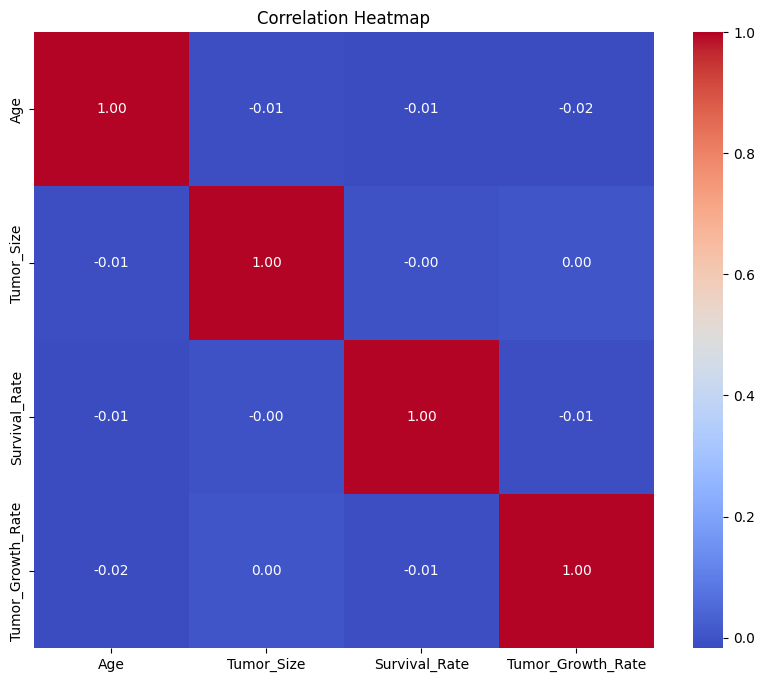

In [18]:
# Visualize the correlation (how features relate to each other).
corr_matrix = X_train_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Skewness & Kurtosis Distribution**
<center>
<img src="../asset/skew_kurt.png" height=350px;/>

**Summary:**
- Based on the descriptive statistics and skewness, seems like numerical features has a nearly-normal distribution.
- Based on the correlation, there are no multicollinearity between features.
- Based on the negative value of kurtosis, seems like the numerical features has platykurtic distribution (fewer outliers in the data)
- We need to ensure it using visualization.

### 3.3. Categorical EDA
---

In [19]:
# Check the proportion of each unique value in the categorical features.
for col in X_train_cat.columns:    
    print(X_train_cat[col].value_counts(normalize=True))
    print()

Gender
Female    0.502938
Male      0.497063
Name: proportion, dtype: float64

Location
Temporal     0.254375
Occipital    0.249250
Parietal     0.248500
Frontal      0.247875
Name: proportion, dtype: float64

Histology
Glioblastoma       0.253500
Meningioma         0.250625
Medulloblastoma    0.250437
Astrocytoma        0.245438
Name: proportion, dtype: float64

Stage
II     0.254375
III    0.249312
IV     0.248938
I      0.247375
Name: proportion, dtype: float64

Symptom_1
Seizures         0.252500
Headache         0.252500
Nausea           0.248562
Vision Issues    0.246438
Name: proportion, dtype: float64

Symptom_2
Seizures         0.255563
Headache         0.250188
Vision Issues    0.249250
Nausea           0.245000
Name: proportion, dtype: float64

Symptom_3
Nausea           0.252625
Vision Issues    0.250563
Seizures         0.249312
Headache         0.247500
Name: proportion, dtype: float64

Radiation_Treatment
No     0.500437
Yes    0.499563
Name: proportion, dtype: float64



**Summary:**
- Seems like categorical features have an equally proportion.
- We need to ensure it using visualization.

## 3.4. Visualization
---

# **(WILL BE UPDATED SOON)**

**Statistika Deskriptif**

In [20]:
X_train.sample(10)

,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
Patient_ID,,,,,,,,,,,,,,,,,
7536,58,Female,7.201863,Parietal,Medulloblastoma,IV,Nausea,Headache,Nausea,Yes,Yes,No,96.308079,2.820676,No,Negative,Yes
2405,35,Female,0.957468,Occipital,Meningioma,II,Vision Issues,Headache,Seizures,Yes,Yes,Yes,72.849295,1.550413,No,Negative,No
10212,21,Male,1.943714,Occipital,Glioblastoma,IV,Vision Issues,Seizures,Headache,Yes,Yes,Yes,89.645608,1.092858,Yes,Negative,No
9765,70,Male,7.334678,Parietal,Glioblastoma,IV,Nausea,Nausea,Nausea,Yes,No,Yes,52.034564,2.361951,No,Negative,No
18101,57,Female,3.395200,Frontal,Medulloblastoma,III,Seizures,Seizures,Vision Issues,Yes,No,Yes,49.401847,0.114807,Yes,Positive,Yes
1199,31,Male,2.599453,Occipital,Astrocytoma,II,Seizures,Seizures,Vision Issues,Yes,No,Yes,43.614265,2.515163,Yes,Negative,Yes
16246,62,Female,4.777224,Occipital,Meningioma,II,Vision Issues,Nausea,Seizures,Yes,Yes,No,69.093717,1.622932,Yes,Positive,No
6215,27,Male,3.944777,Temporal,Medulloblastoma,III,Nausea,Headache,Headache,No,No,No,40.547124,1.438914,No,Negative,No
18078,39,Male,1.244457,Parietal,Meningioma,IV,Nausea,Vision Issues,Seizures,No,No,Yes,73.373393,0.920751,No,Negative,No


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 19882 to 14592
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  16000 non-null  int64  
 1   Gender               16000 non-null  object 
 2   Tumor_Size           16000 non-null  float64
 3   Location             16000 non-null  object 
 4   Histology            16000 non-null  object 
 5   Stage                16000 non-null  object 
 6   Symptom_1            16000 non-null  object 
 7   Symptom_2            16000 non-null  object 
 8   Symptom_3            16000 non-null  object 
 9   Radiation_Treatment  16000 non-null  object 
 10  Surgery_Performed    16000 non-null  object 
 11  Chemotherapy         16000 non-null  object 
 12  Survival_Rate        16000 non-null  float64
 13  Tumor_Growth_Rate    16000 non-null  float64
 14  Family_History       16000 non-null  object 
 15  MRI_Result           16000 non-null  

In [22]:
X_train.describe()

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,16000.00000,16000.000000,16000.000000,16000.000000
mean,49.41975,5.214678,70.095336,1.546926
std,17.41003,2.755902,17.273182,0.835417
min,20.00000,0.500599,40.002386,0.100820
25%,34.00000,2.803852,55.177281,0.832310
50%,49.00000,5.166046,70.235417,1.541899
75%,65.00000,7.600040,85.018780,2.261490
max,79.00000,9.999420,99.998125,2.999804


**Data Cleaning**

In [23]:
X_train.isna().sum() / len(X_train) * 100

Age                    0.0
Gender                 0.0
Tumor_Size             0.0
Location               0.0
Histology              0.0
Stage                  0.0
Symptom_1              0.0
Symptom_2              0.0
Symptom_3              0.0
Radiation_Treatment    0.0
Surgery_Performed      0.0
Chemotherapy           0.0
Survival_Rate          0.0
Tumor_Growth_Rate      0.0
Family_History         0.0
MRI_Result             0.0
Follow_Up_Required     0.0
dtype: float64

In [24]:
X_train.duplicated().sum()

np.int64(0)

In [25]:
X_train = X_train.drop('Patient_ID', axis=1)

KeyError: "['Patient_ID'] not found in axis"

In [ ]:
X_train_data = pd.DataFrame(X_train)
y_train_data = pd.Series(y_train)

df_plot = X_train_data.copy()
df_plot['Diagnosis'] = y_train_data

print("DataFrame Gabungan untuk Plotting:")
df_plot

## Viasualisasi Fitur Numerik

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df_plot, x='Age', bins = 30, kde= True)
plt.title('Distribusi Umur Pasien')

In [ ]:
grouped_age = [0, 20, 30, 50, 70, 100]  
labels = ['Child/teens', 'Young Adult', 'Adult', 'Senior', 'Elderly']

X_train['Age_Group'] = pd.cut(X_train['Age'], bins=grouped_age, labels=labels)

In [ ]:
plt.title("Age grouped")
sns.countplot(X_train['Age_Group'])


# Brain Tumor Size Categories (based on neurosurgical literature)

| **Category** | **Diameter (cm)** | **Notes** |
|--------------|-------------------|-----------|
| Small        | < 2 cm            | Often incidental, may cause no symptoms. |
| Medium       | 2 – 3 cm          | Symptoms may start depending on location. |
| Large        | > 3 – 4.5 cm      | Often symptomatic, pressure effects more likely. |
| Giant        | ≥ 5 cm            | Common cutoff for “giant meningioma” in most studies. |
| Very Giant   | ≥ 7 cm            | Rare, but reported; causes severe mass effect. |

---

📌 **Key points:**
- WHO **grade ≠ size** (biology determines grade).
- **≥ 5 cm** is the most common definition of *giant meningioma*.
- **≥ 7 cm** is sometimes called *very giant* in case reports.
- Size matters for **surgery & symptoms**, not for grading.



In [ ]:


size_tumor = [0,2,3,5,7,100]
tumor_label = ["small","medium","large","Giant","very Giant"]

X_train["Tumor_size_grouped"] = pd.cut(X_train["Tumor_Size"],labels=tumor_label,bins=size_tumor)

In [ ]:
plt.title("Tumor size grouped")
sns.countplot(X_train['Tumor_size_grouped'], color="red")

In [ ]:
Surivival_rate = [0,25,50,75,100]
labels_survival = ["low","moderetly low", "moderetly high", "high"]

X_train["Survival_rate_Group"] = pd.cut(X_train["Survival_Rate"], labels=labels_survival,bins=Surivival_rate)

In [ ]:
sns.countplot(X_train["Survival_rate_Group"])

In [ ]:
Surivival_rate = [0,25,50,75,100]
labels_survival = ["low","moderetly low", "moderetly high", "high"]

X_train["Tumor_Growth_Rate_Group"] = pd.cut(X_train["Tumor_Growth_Rate"], labels=labels_survival,bins=Surivival_rate)

sns.countplot(X_train["Tumor_size_grouped"])

## Visualisasi Fitur Kategorikal

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Location')
plt.title('Distribusi Stage Tumor di Setiap Lokasi')

In [ ]:
df_plot.info()

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Histology')
plt.title('Frekuensi Setiap Tipe Histologi')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Stage')
plt.title('Distribusi Stadium Tumor')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Radiation_Treatment')
plt.title('Distribusi Pasien Berdasarkan Terapi Radiasi')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Surgery_Performed')
plt.title('Persebaran Kategori Surgery Performed')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Chemotherapy')
plt.title('Distribusi Pasien Berdasarkan Kemoterapi')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Family_History')
plt.title('Frekuensi Riwayat Kanker dalam Keluarga')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='MRI_Result')
plt.title('Frekuensi Kategori MRI Result')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Follow_Up_Required')
plt.title('Frekuensi Follow-Up Pasien')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Diagnosis')
plt.title('Frekuensi Setiap Jenis Diagnosis')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_1')
plt.title('Distribusi Pasien Berdasarkan Gejala 1')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_2')
plt.title('Distribusi Pasien Berdasarkan Gejala 2')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_3')
plt.title('Distribusi Pasien Berdasarkan Gejala 3')

## Kesimpulan untuk distribusi setiap fitur
- Setelah dilakukan visualisasi untuk melihat distribusi setiap fitur kami dapati bahwa semua fitur memiliki **Distribusi Normal**.
- Tidak perlu melakukan Oversampling/Undersampling.

## Hubungan corelasi

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_plot.corr(numeric_only=True), annot=True)